## house prices - advanced regression techniques approach

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading to the traindata
df=pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
df.GarageCars

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [7]:
# reading to the testdata
test_df=pd.read_csv('test.csv')

In [8]:
test_df.shape

(1459, 80)

<AxesSubplot:>

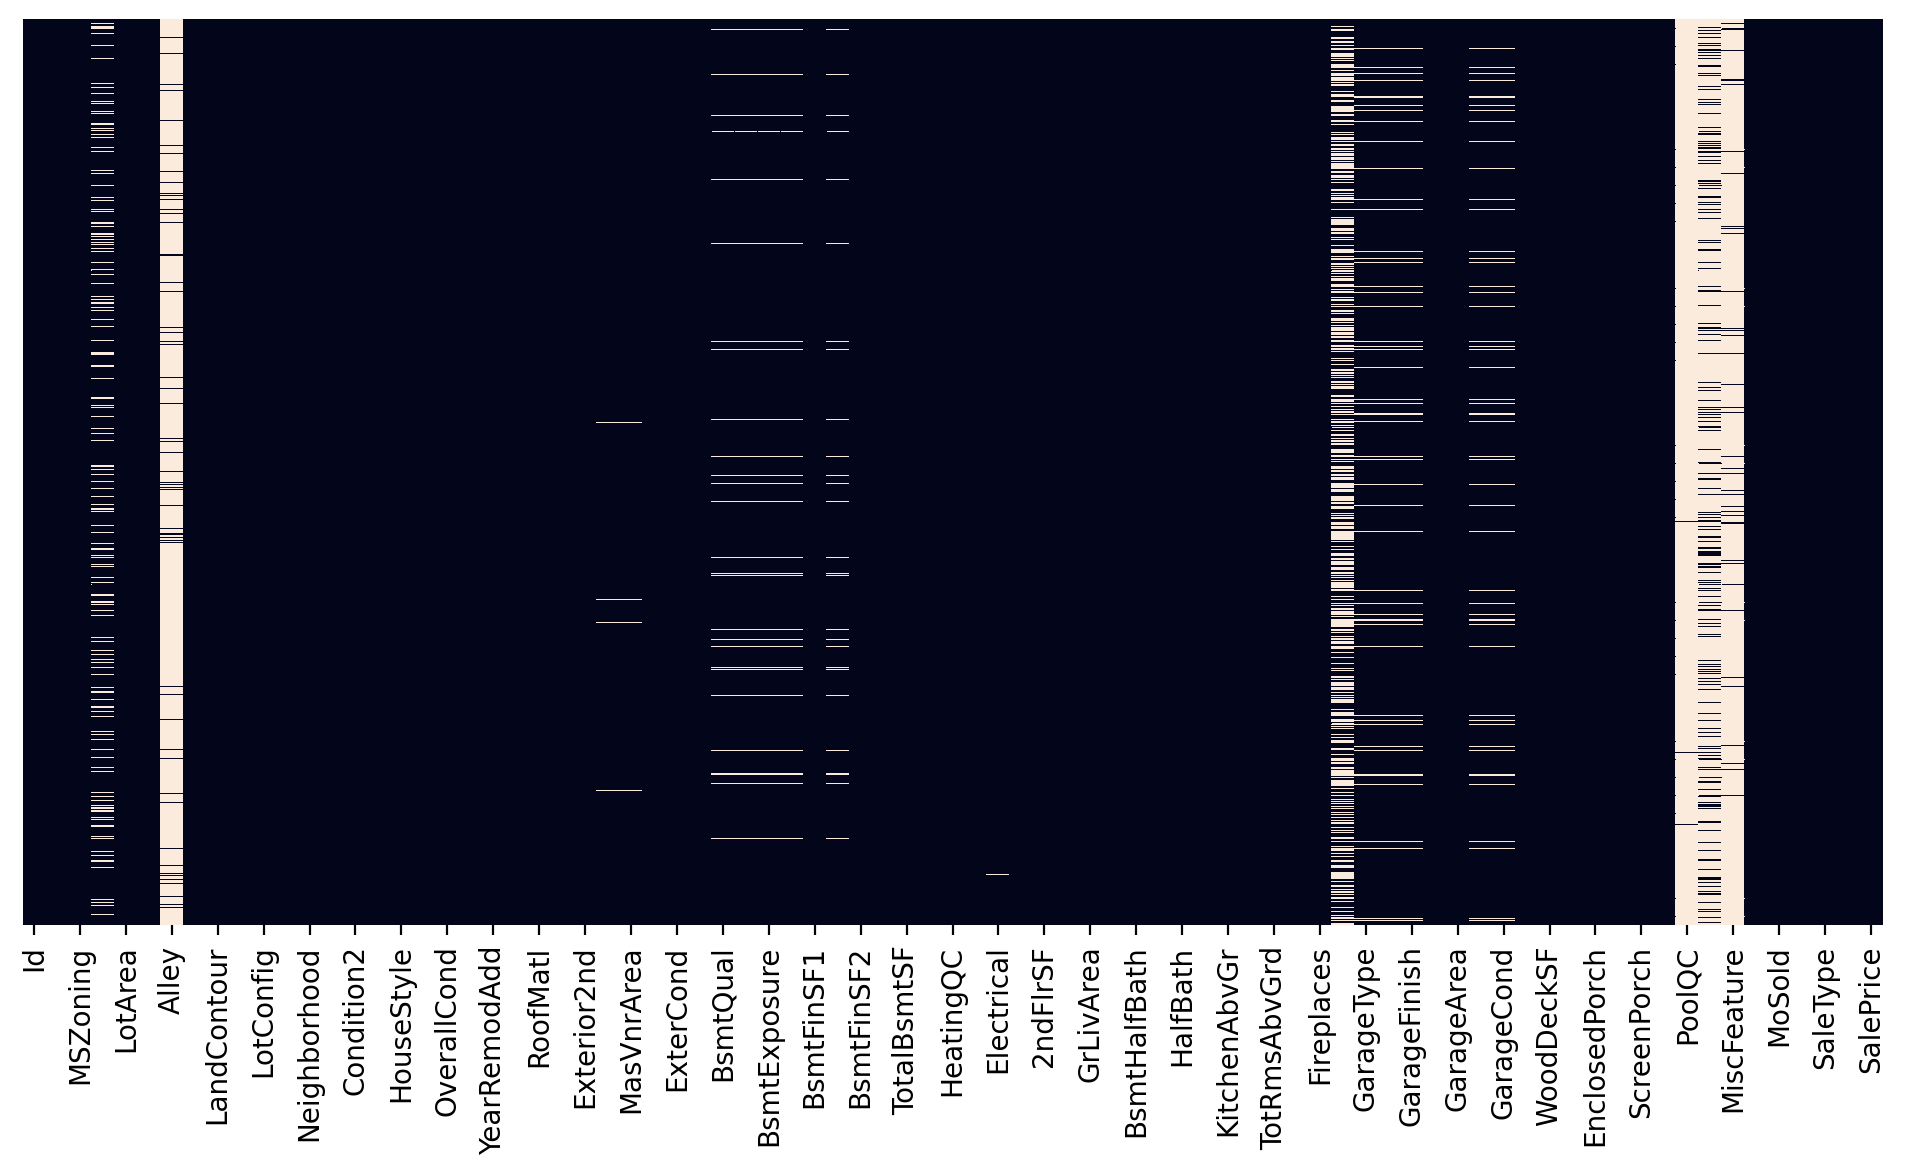

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.drop('SalePrice',axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [11]:
# concatnating both  triandata and testdata with drop sales column

main_df=pd.concat([df.drop('SalePrice',axis=1),test_df],axis=0)

In [12]:
main_df=main_df.drop('Id',axis=1)


In [13]:
main_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [14]:
main_df.shape

(2919, 79)

In [15]:
# creating function for checking percentage of null

def percent_null(df):
    percent_nan=df.isnull().sum()/len(main_df)*100
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [16]:
percent_nan=percent_null(main_df)

In [17]:
percent_nan

TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
KitchenQual      0.034258
Electrical       0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
Functional       0.068517
Utilities        0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
MSZoning         0.137033
MasVnrArea       0.787941
MasVnrType       0.822199
BsmtFinType1     2.706406
BsmtFinType2     2.740665
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
GarageType       5.378554
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
LotFrontage     16.649538
FireplaceQu     48.646797
Fence           80.438506
Alley           93.216855
MiscFeature     96.402878
PoolQC          99.657417
dtype: float64

(0.0, 1.0)

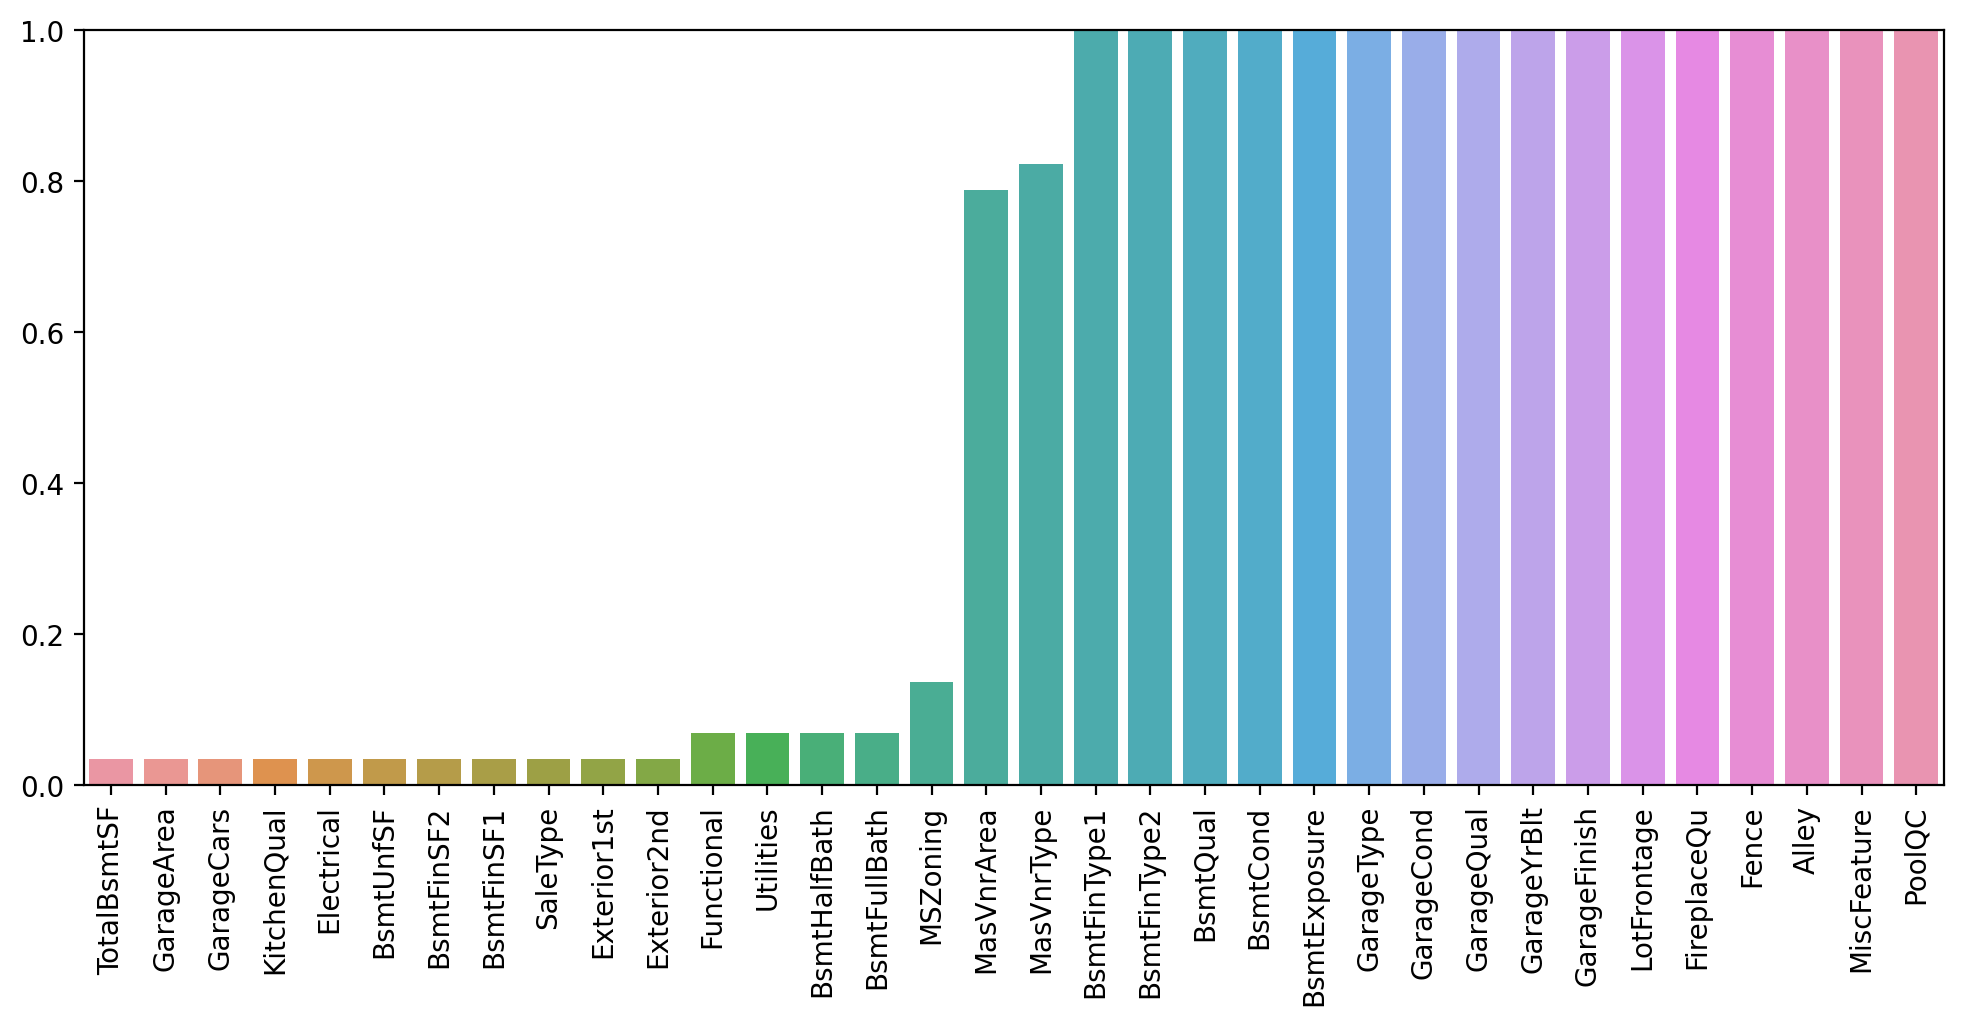

In [18]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim((0,1))

In [19]:
percent_nan[percent_nan<1]

TotalBsmtSF     0.034258
GarageArea      0.034258
GarageCars      0.034258
KitchenQual     0.034258
Electrical      0.034258
BsmtUnfSF       0.034258
BsmtFinSF2      0.034258
BsmtFinSF1      0.034258
SaleType        0.034258
Exterior1st     0.034258
Exterior2nd     0.034258
Functional      0.068517
Utilities       0.068517
BsmtHalfBath    0.068517
BsmtFullBath    0.068517
MSZoning        0.137033
MasVnrArea      0.787941
MasVnrType      0.822199
dtype: float64

In [20]:
main_df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1454    NaN
1455    NaN
1456     TA
1457    NaN
1458     TA
Name: FireplaceQu, Length: 2919, dtype: object

In [21]:
main_df['Electrical'] = main_df['Electrical'].fillna(main_df['Electrical'].mode()[0])


In [22]:
main_df['GarageCars']=test_df['GarageCars'].fillna(main_df['GarageCars'].mean())

In [23]:
main_df['FireplaceQu'] =main_df['FireplaceQu'].fillna(main_df['FireplaceQu'].mode()[0])
main_df['BsmtFinType2']=main_df['BsmtFinType2'].fillna(main_df['BsmtFinType2'].mode()[0])

main_df['MasVnrType']=main_df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
main_df['MasVnrArea']=main_df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

main_df['BsmtExposure']=main_df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


main_df['GarageFinish']=main_df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
main_df['GarageQual']=main_df['GarageQual'].fillna(df['GarageQual'].mode()[0])
main_df['GarageCond']=main_df['GarageCond'].fillna(df['GarageCond'].mode()[0])

main_df['BsmtCond']=main_df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
main_df['BsmtQual']=main_df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [24]:
main_df = main_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis= 1)

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

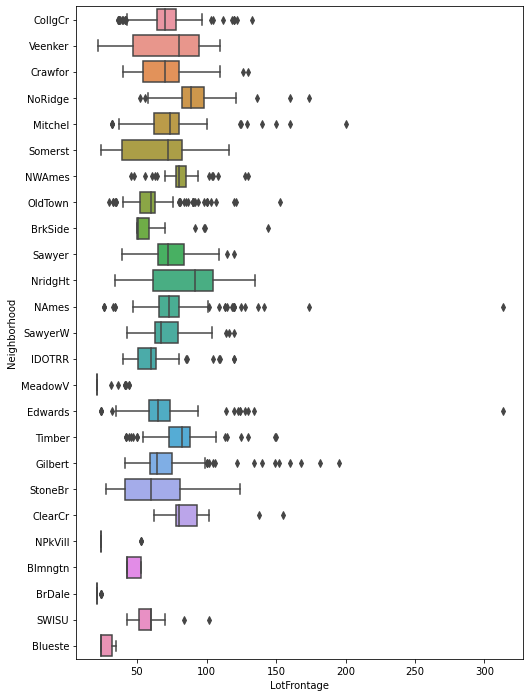

In [25]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=main_df,orient='h')

In [26]:
# I try transform function for filling data

main_df['LotFrontage']=main_df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

## Intermediate checking of null

(0.0, 1.0)

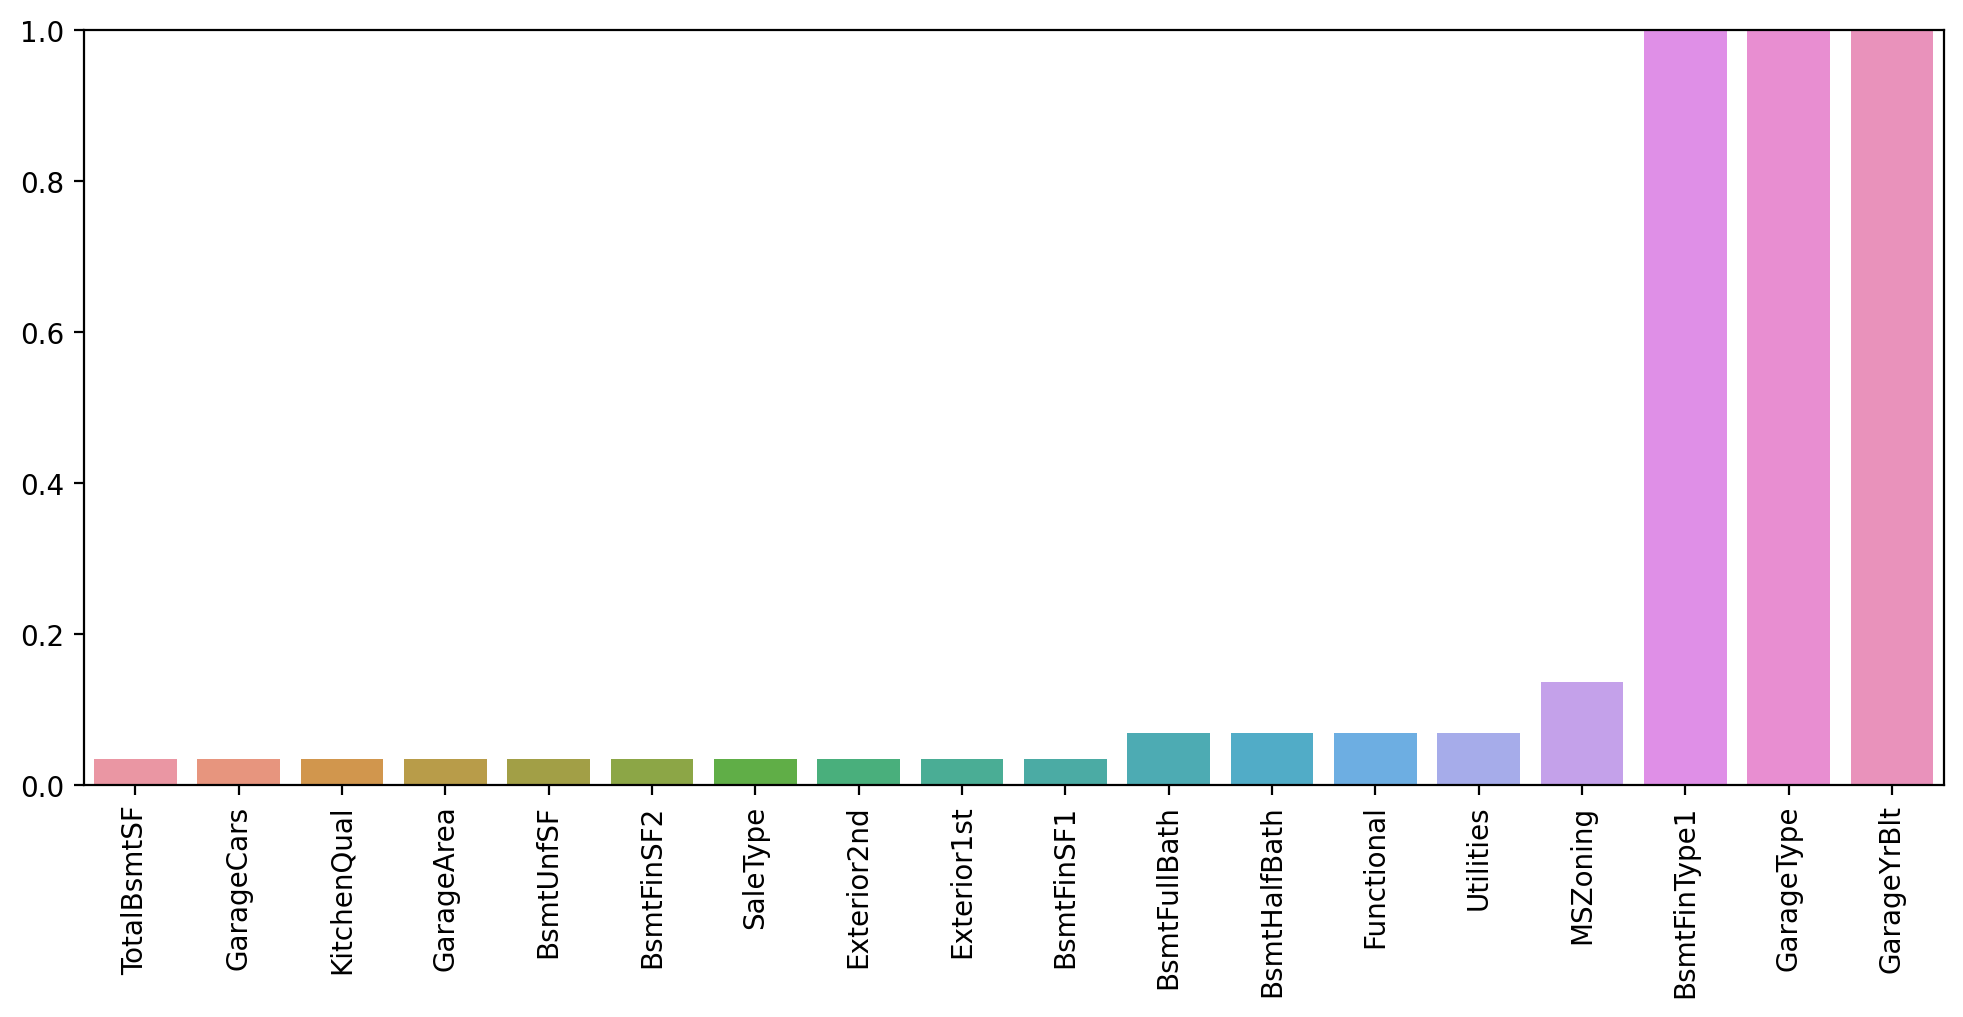

In [27]:
percent_nan=percent_null(main_df)
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim((0,1))

<AxesSubplot:>

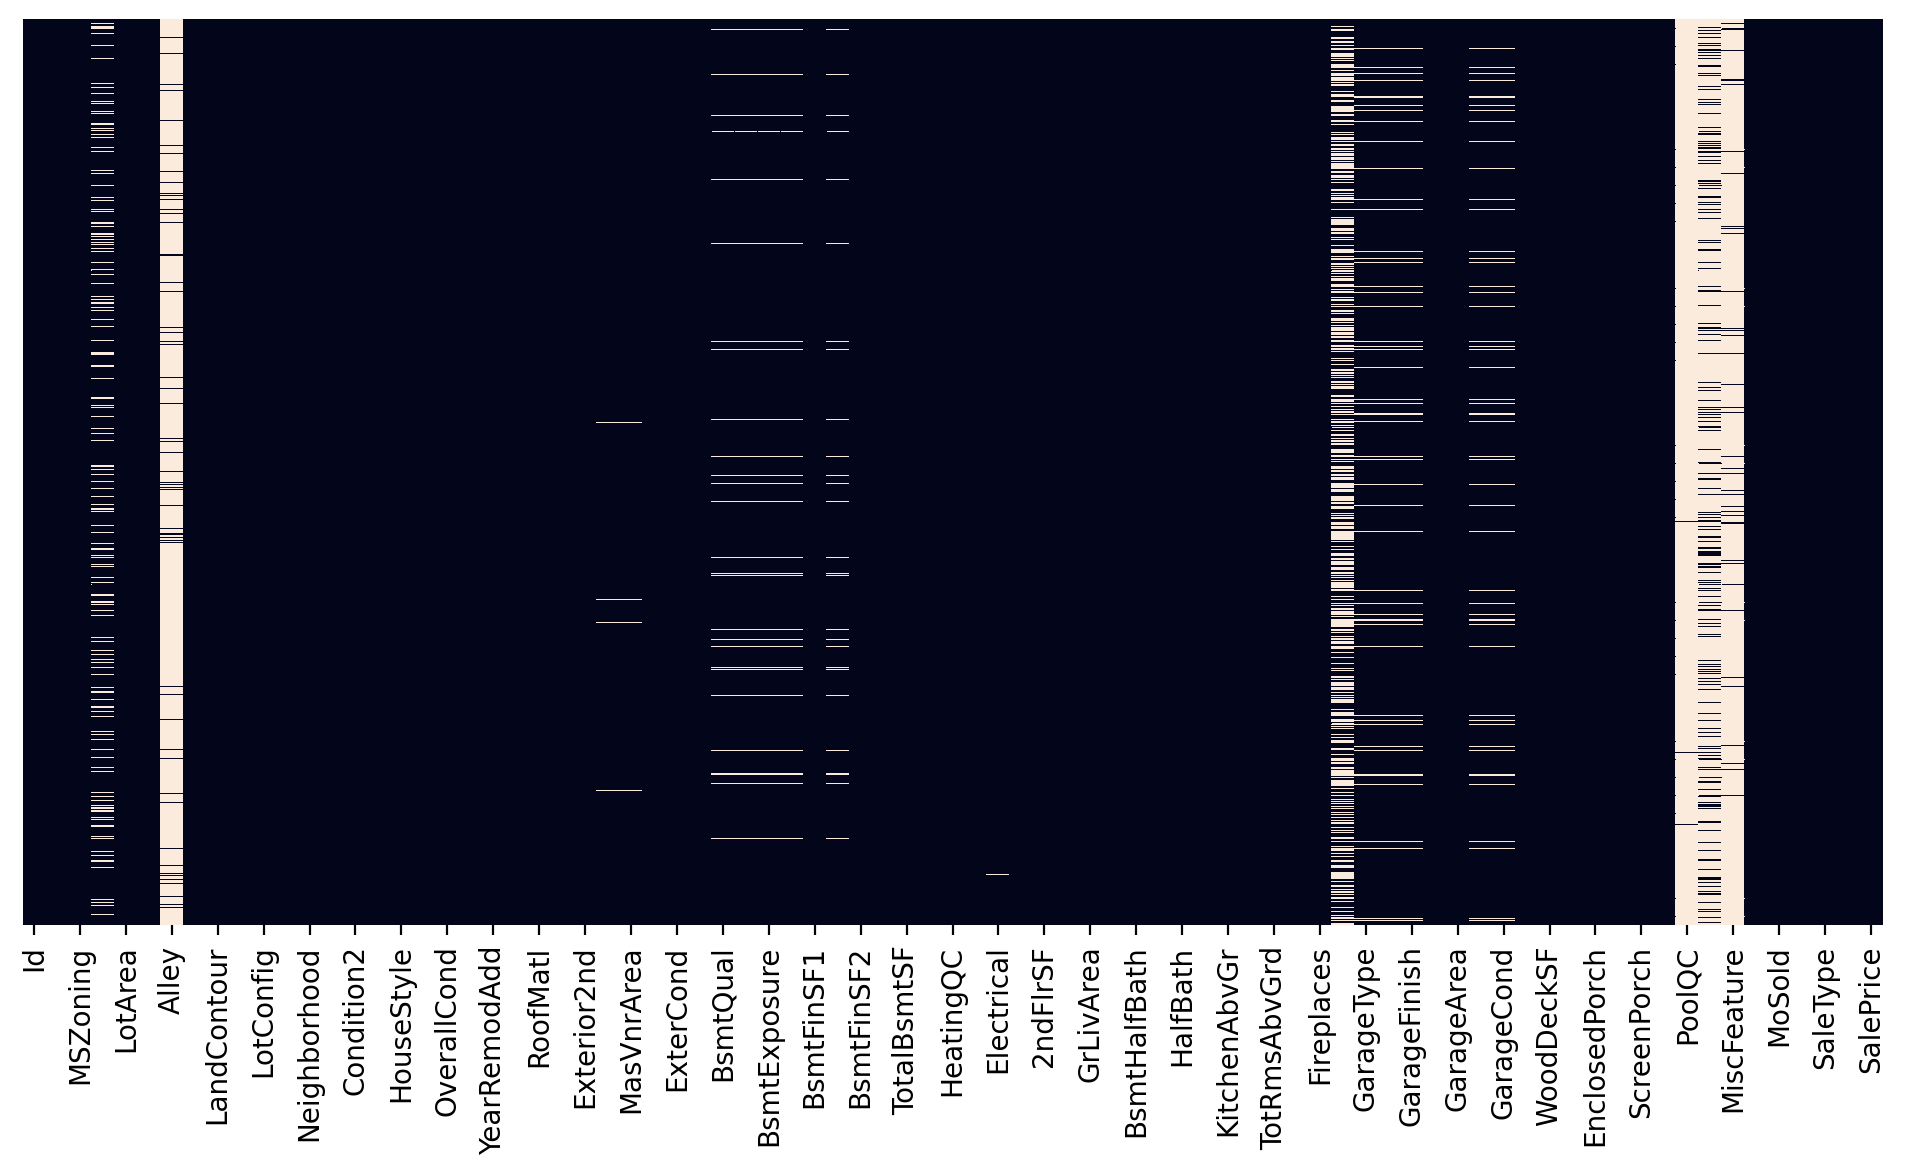

In [28]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [29]:
main_df['Utilities']=main_df['Utilities'].fillna(main_df['Utilities'].mode()[0])
main_df['Exterior1st']=main_df['Exterior1st'].fillna(main_df['Exterior1st'].mode()[0])

main_df['Exterior2nd']=main_df['Exterior2nd'].fillna(main_df['Exterior2nd'].mode()[0])
main_df['BsmtFinType1']=main_df['BsmtFinType1'].fillna(main_df['BsmtFinType1'].mode()[0])

main_df['BsmtFinSF1']=main_df['BsmtFinSF1'].fillna(main_df['BsmtFinSF1'].mean())
main_df['BsmtFinSF2']=main_df['BsmtFinSF2'].fillna(main_df['BsmtFinSF2'].mean())
main_df['BsmtUnfSF']=main_df['BsmtUnfSF'].fillna(main_df['BsmtUnfSF'].mean())
main_df['TotalBsmtSF']=main_df['TotalBsmtSF'].fillna(main_df['TotalBsmtSF'].mean())

main_df['BsmtFullBath']=main_df['BsmtFullBath'].fillna(main_df['BsmtFullBath'].mode()[0])
main_df['BsmtHalfBath']=main_df['BsmtHalfBath'].fillna(main_df['BsmtHalfBath'].mode()[0])

main_df['KitchenQual']=main_df['KitchenQual'].fillna(main_df['KitchenQual'].mode()[0])
main_df['Functional']=main_df['Functional'].fillna(main_df['Functional'].mode()[0])

main_df['GarageCars']=main_df['GarageCars'].fillna(main_df['GarageCars'].mean())
main_df['GarageArea']=main_df['GarageArea'].fillna(main_df['GarageArea'].mean())

main_df['SaleType']=main_df['SaleType'].fillna(main_df['SaleType'].mode()[0])
main_df['GarageType']=main_df['GarageType'].fillna(main_df['GarageType'].mode()[0])

main_df.drop(['GarageYrBlt'],axis=1,inplace=True)

main_df['MSZoning']=main_df['MSZoning'].fillna(main_df['MSZoning'].mode()[0])

## Final checking of nulll

In [30]:
percent_nan=percent_null(main_df)
percent_nan.index

Index([], dtype='object')

<AxesSubplot:>

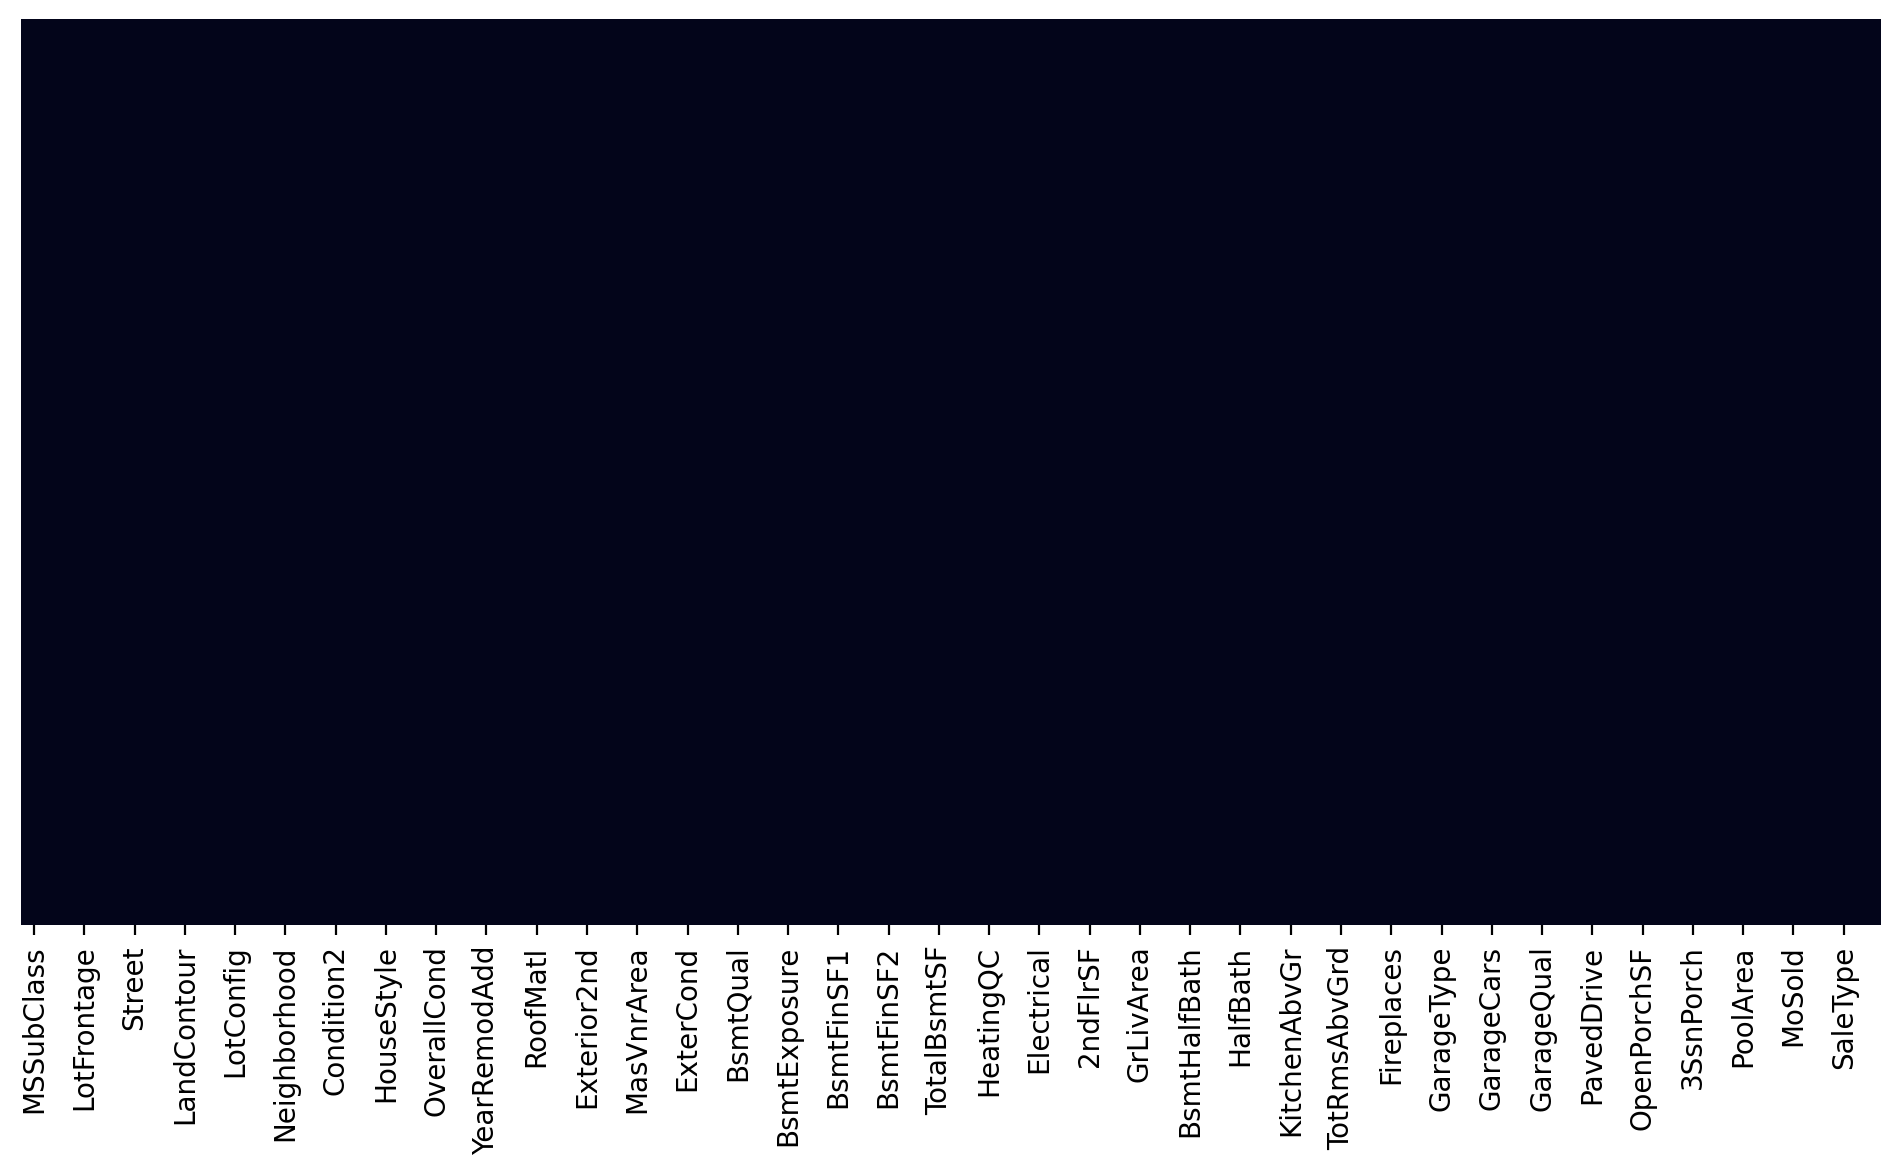

In [31]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)


## creating categerical Features

In [32]:
# selecting object dtype columns 
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [33]:
percent_nan=percent_null(main_df)
percent_nan

Series([], dtype: float64)

In [34]:
def category_onehot_multcols(multcolumns):
    df_final=main_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(main_df[fields],drop_first=True)
        
        main_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([main_df,df_final],axis=1)
        
    return df_final

In [35]:
main_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [36]:
main_df.shape

(2919, 235)

In [37]:
main_df =main_df.loc[:,~main_df.columns.duplicated()]

In [38]:
main_df.shape

(2919, 175)

In [39]:
# splitting up  as triandata and test data 
Train_df=main_df.iloc[:1460,:]
Test_df=main_df.iloc[1460:,:]

In [40]:
Train_df.shape

(1460, 175)

In [41]:
X_train=Train_df
y_train=df['SalePrice']

## Applying mechinelearning algarithams

In [42]:
import xgboost
regressor=xgboost.XGBRegressor()

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [45]:
# Define the grid of hyperparameters to search
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [46]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 3, 
            return_train_score = True,
            random_state=42)

In [47]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   53.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [48]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Final kaggle submission

In [51]:
y_pred=regressor.predict(Test_df)

In [52]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)